# 二日目後半

# 検定に挑戦

[b-1] まずは必要となるPythonのモジュール（ライブラリ）をimportしましょう。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import math

## 結果ファイルの読み込み

[b-2] 前回みなさんが測定してくれた温度，湿度を CSV という形式の表にしてあります。まずはそれを読み込みましょう。
読み込み方は前回やった方法と同じです。Pandasのread_csvというメソッドでデータフレームdfに読み込みます。
読み込んだらdfの中身を表示してみます。dfと一行書くだけで中身を表示してくれます(初期設定ではresults_v1_tmp.csvというファイル名が指定されていますが，これはサンプルファイルです。皆さんが測定してくれた温度・湿度をいれたファイル名は当日お知らせします。)。

In [2]:
# csv fileを読み込む (df=DataFrame, pandasの機能でcsvファイルを読み込む)
df = pd.read_csv('./results_v1.csv', index_col='number')
df

,name,pref,temp,humid
number,,,,
1,HORIUCHI,北海道,21.5,18.8
2,TANAKA,秋田県,22.1,36.6
3,ENDO,茨城県,24.8,31.5
4,SAWAHATA,茨城県,21.8,41.2
5,TAJIRI,群馬県,21.2,51.8
6,HANAZAKI,東京都,24.3,48.0
7,ISHII,埼玉県,21.9,38.9
8,NAKAMURA,千葉県,24.2,43.9
9,IKEDA,東京都,25.8,26.0


[b-3] 全員のデータが一気に読み込めていることが分かります。特にエラーも出ていません。ところが表の中に多くの'NaN'という文字が書かれています。このNaNというのは，NaN(Not a number)という意味で，プログラムの中の計算で0(ゼロ)である数字を割ってしまい，答えが無限大になってしまうような計算をしたときなどにエラーとして表示されます。今回のケースでは，もともとのcsvファイルに空白があった場合，このNaNが埋められているようです。

このままだと計算できません。ここではNaNが存在する行を削除する以下のdropnaというメソッドを使ってみましょう。
削除後のデータをdf2に落とし込みます。その後，早速df2を表示してみると，

In [3]:
df2 = df.dropna(how='any')
df2

,name,pref,temp,humid
number,,,,
1,HORIUCHI,北海道,21.5,18.8
2,TANAKA,秋田県,22.1,36.6
3,ENDO,茨城県,24.8,31.5
4,SAWAHATA,茨城県,21.8,41.2
5,TAJIRI,群馬県,21.2,51.8
6,HANAZAKI,東京都,24.3,48.0
7,ISHII,埼玉県,21.9,38.9
8,NAKAMURA,千葉県,24.2,43.9
9,IKEDA,東京都,25.8,26.0


[b-4] NaNを含まない行だけが残っていることが分かります。

次にこちらをnumpyの配列 my_array に落とし込んでみます。

In [4]:
my_array = np.array(df2)
my_array

array([['HORIUCHI', '北海道', 21.5, 18.8],
       ['TANAKA', '秋田県', 22.1, 36.6],
       ['ENDO', '茨城県', 24.8, 31.5],
       ['SAWAHATA', '茨城県', 21.8, 41.2],
       ['TAJIRI', '群馬県', 21.2, 51.8],
       ['HANAZAKI', '東京都', 24.3, 48.0],
       ['ISHII', '埼玉県', 21.9, 38.9],
       ['NAKAMURA', '千葉県', 24.2, 43.9],
       ['IKEDA', '東京都', 25.8, 26.0],
       ['KAZATO', '千葉県', 22.9, 46.1],
       ['OTSUKA', '千葉県', 26.6, 42.0],
       ['OTANI', '千葉県', 25.2, 43.1],
       ['UEKI', '千葉県', 25.7, 59.8],
       ['KAWAI', '東京都', 26.9, 46.6],
       ['WATANABE', '東京都', 23.6, 45.2],
       ['OKAMURA', '東京都', 19.4, 52.9],
       ['MIYAKO', '東京都', 24.4, 41.1],
       ['TAKAI', '東京都', 26.5, 36.2],
       ['IGAWA', '東京都', 21.8, 47.0],
       ['HIRANO', '福井県', 23.1, 45.8],
       ['NISHIMOTO', '福井県', 26.1, 50.3],
       ['KAMEITA', '長野県', 23.1, 41.0],
       ['ASANO', '静岡県', 22.0, 45.0],
       ['YAMASHITA', '静岡県', 19.8, 53.8],
       ['YAMADA', '三重県', 26.2, 32.0],
       ['SHIMASHITA', '京都府', 23.5, 56.1],
 

[b-5] さて，本日やりたいことの一つが，「東と西にデータを分けてみてその違いがあるのかないのか検定してみたい」というものでした。データをまずは東と西に分ける必要があります。

そこで都道府県名によって'east'なのか 'west' なのかを判断しないといけません。まずはある都道府県名が
与えられたときに，それがeastなのかwestなのかを判断できるようにしたいと思います。

まずは参加者の都道府県名のリストを出してみます。空白じゃない参加者の人数も確認してみましょう。

In [5]:
my_pref = np.array(df2['pref'])
print("人数は %d 人です" % my_pref.size)   # %d では整数を代入できます
print("参加者の都道府県名は %s です" % my_pref)  # %s では string(文) を代入できます

人数は 38 人です
参加者の都道府県名は ['北海道' '秋田県' '茨城県' '茨城県' '群馬県' '東京都' '埼玉県' '千葉県' '東京都' '千葉県' '千葉県' '千葉県'
 '千葉県' '東京都' '東京都' '東京都' '東京都' '東京都' '東京都' '福井県' '福井県' '長野県' '静岡県' '静岡県'
 '三重県' '京都府' '兵庫県' '岡山県' '岡山県' '山口県' '山口県' '福岡県' '宮崎県' '沖縄県' '東京都' '東京都'
 '東京都' '東京都'] です


[b-6] 全国津々浦々であることが分かりますね。さて，各都道府県名をもとにE(=east)かW(=west)に判別するのには
Pythonのdictionary（辞書）機能を使いたいと思います。

In [6]:
mydict = {'北海道':'E','青森県':'E','岩手県':'E','宮城県':'E','秋田県':'E','山形県':'E',
          '福島県':'E','茨城県':'E','栃木県':'E','群馬県':'E','埼玉県':'E','千葉県':'E',
          '東京都':'E','神奈川県':'E','新潟県':'E','富山県':'W','石川県':'W','福井県':'W',
          '山梨県':'E','長野県':'E','岐阜県':'W','静岡県':'W','愛知県':'W','三重県':'W',
          '滋賀県':'W','京都府':'W','大阪府':'W','兵庫県':'W','奈良県':'W','和歌山県':'W',
          '鳥取県':'W','島根県':'W','岡山県':'W','広島県':'W','山口県':'W','徳島県':'W',
          '香川県':'W','愛媛県':'W','高知県':'W','福岡県':'W','佐賀県':'W','長崎県':'W',
          '熊本県':'W','大分県':'W','宮崎県':'W','鹿児島県':'W','沖縄県':'W'}

[b-7] これが定義されていると，例えば mydict.get('岐阜県')とすると，'W'が返ってきます。
この東か西かの定義ですが，NTT東日本とNTT西日本がそれぞれ担当している都道府県で分けました。

In [7]:
mydict.get('岐阜県')

'W'

[b-8] では，この辞書機能を使って先程の my_pref のリストを'W','E'のリストに変換しましょう。

In [8]:
my_pref_ew = [] # E,Wを詰めるリスト
for key in my_pref: # my_prefの都道府県リストの各要素 keyに対して  
    if key in mydict:           # mydict内で定義されていれば
        val = mydict.get(key)   # val = E or W　
        #print(val)
        my_pref_ew.append(val)
    else:                       # mydict内で定義されていなければ　　　
        my_pref_ew.append("XX")
        #print("x")
print(" my_pref_ew の中身は %s です" % my_pref_ew)

 my_pref_ew の中身は ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'W', 'W', 'E', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'E', 'E', 'E', 'E'] です


[b-9] ではこの新たに作ったリストをmy_arrayに付け足しましょう。ここでは insert メソッドを使います。
都道府県名の後に挿入したいので，2を指定します（0から数えて，0,1,2なので3番目です），最後のaxisは次元を表しています。この配列は２次元配列（行列）です。今回は’列’を挿入したいのでaxis=1とします。（'行'を代入したいときはaxis=0です）。

In [9]:
my_array_ew = np.insert(my_array,2,my_pref_ew,axis=1)
my_array_ew

array([['HORIUCHI', '北海道', 'E', 21.5, 18.8],
       ['TANAKA', '秋田県', 'E', 22.1, 36.6],
       ['ENDO', '茨城県', 'E', 24.8, 31.5],
       ['SAWAHATA', '茨城県', 'E', 21.8, 41.2],
       ['TAJIRI', '群馬県', 'E', 21.2, 51.8],
       ['HANAZAKI', '東京都', 'E', 24.3, 48.0],
       ['ISHII', '埼玉県', 'E', 21.9, 38.9],
       ['NAKAMURA', '千葉県', 'E', 24.2, 43.9],
       ['IKEDA', '東京都', 'E', 25.8, 26.0],
       ['KAZATO', '千葉県', 'E', 22.9, 46.1],
       ['OTSUKA', '千葉県', 'E', 26.6, 42.0],
       ['OTANI', '千葉県', 'E', 25.2, 43.1],
       ['UEKI', '千葉県', 'E', 25.7, 59.8],
       ['KAWAI', '東京都', 'E', 26.9, 46.6],
       ['WATANABE', '東京都', 'E', 23.6, 45.2],
       ['OKAMURA', '東京都', 'E', 19.4, 52.9],
       ['MIYAKO', '東京都', 'E', 24.4, 41.1],
       ['TAKAI', '東京都', 'E', 26.5, 36.2],
       ['IGAWA', '東京都', 'E', 21.8, 47.0],
       ['HIRANO', '福井県', 'W', 23.1, 45.8],
       ['NISHIMOTO', '福井県', 'W', 26.1, 50.3],
       ['KAMEITA', '長野県', 'E', 23.1, 41.0],
       ['ASANO', '静岡県', 'W', 22.0, 45.0],
       

うまくいったようです。都道府県名とE,Wが対応しているか確認してみましょう。

# 東西データの確認

[b-10] では，早速ですが，まずは東（=E）を抜き出してみましょう。下のコートでは１行目でmy_array_ewの中である条件を満たすものだけ抜き出されています。条件は( my_array_ewの2列（=3番めの列）が'E'ならば )です。
2行目では新たに作ったarray_eastの3列目（温度）を，
3行目では4列目（湿度）だけを抜き出して，新たな配列を作っています。

## 東のデータの内容
[b-11] 東のデータを見てみます。

In [10]:
array_east = my_array_ew[my_array_ew[:,2]=='E']
temp_east = array_east[:,3]
humid_east = array_east[:,4]
print("東のデータ数は", temp_east.size)
print("\n東の温度は: ", temp_east)
print("東の温度の平均値は: %5.1F 度" % temp_east.mean())
print("東の温度の標準偏差は: %5.1F 度" % temp_east.std())
print("東の最低温度: %4.1F 度, 最高温度: %4.1F 度" % (temp_east.min(),temp_east.max()))
print("\n東の湿度は: ", humid_east)
print("東の湿度の平均値は: %5.1F パーセント" % humid_east.mean())
print("東の湿度の標準偏差は: %5.1F パーセント" % humid_east.std())
print("東の最低湿度: %4.1F パーセント, 最高湿度: %4.1F パーセント" % (humid_east.min(),humid_east.max()))

東のデータ数は 24

東の温度は:  [21.5 22.1 24.8 21.8 21.2 24.3 21.9 24.2 25.8 22.9 26.6 25.2 25.7 26.9
 23.6 19.4 24.4 26.5 21.8 23.1 23.7 27.5 23.2 25.0]
東の温度の平均値は:  23.9 度
東の温度の標準偏差は:   2.0 度
東の最低温度: 19.4 度, 最高温度: 27.5 度

東の湿度は:  [18.8 36.6 31.5 41.2 51.8 48.0 38.9 43.9 26.0 46.1 42.0 43.1 59.8 46.6
 45.2 52.9 41.1 36.2 47.0 41.0 32.0 28.0 34.6 23.0]
東の湿度の平均値は:  39.8 パーセント
東の湿度の標準偏差は:   9.6 パーセント
東の最低湿度: 18.8 パーセント, 最高湿度: 59.8 パーセント


## 西のデータの内容

[b-12] 西についても同様な処理をします。東，east -> 西，westに書き換えただけです。


In [11]:
array_west = my_array_ew[my_array_ew[:,2]=='W']
temp_west = array_west[:,3]
humid_west = array_west[:,4]
print("西のデータ数は", temp_west.size)
print("\n西の温度は: ", temp_west)
print("西の温度の平均値は: %5.1F 度" % temp_west.mean())
print("西の温度の標準偏差は: %5.1F 度" % temp_west.std())
print("西の最低温度: %4.1F 度, 最高温度: %4.1F 度" % (temp_west.min(),temp_west.max()))
print("\n西の湿度は: ", humid_west)
print("西の湿度の平均値は: %5.1F パーセント" % humid_west.mean())
print("西の湿度の標準偏差は: %5.1F パーセント" % humid_west.std())
print("西の最低湿度: %4.1F パーセント, 最高湿度: %4.1F パーセント" % (humid_west.min(),humid_west.max()))

西のデータ数は 14

西の温度は:  [23.1 26.1 22.0 19.8 26.2 23.5 28.1 21.6 22.4 22.4 22.3 24.7 22.3 24.7]
西の温度の平均値は:  23.5 度
西の温度の標準偏差は:   2.1 度
西の最低温度: 19.8 度, 最高温度: 28.1 度

西の湿度は:  [45.8 50.3 45.0 53.8 32.0 56.1 41.0 45.0 37.3 45.0 46.8 50.3 63.1 64.7]
西の湿度の平均値は:  48.3 パーセント
西の湿度の標準偏差は:   8.7 パーセント
西の最低湿度: 32.0 パーセント, 最高湿度: 64.7 パーセント


平均値を見ると，余り差がなさそうです。でもこれだけではよく分かりません。やはりグラフで見ないと
直観的には分かりませんね。では見てみましょう。

## 東西のデータをグラフで確認
### 温度のグラフ

[b-13] まずは温度について見てみましょう。

[10.0 12.0 14.0 16.0 18.0 20.0 22.0 24.0 26.0 28.0 30.0 32.0 34.0 36.0
 38.0 40.0]
[11.0 13.0 15.0 17.0 19.0 21.0 23.0 25.0 27.0 29.0 31.0 33.0 35.0 37.0
 39.0]


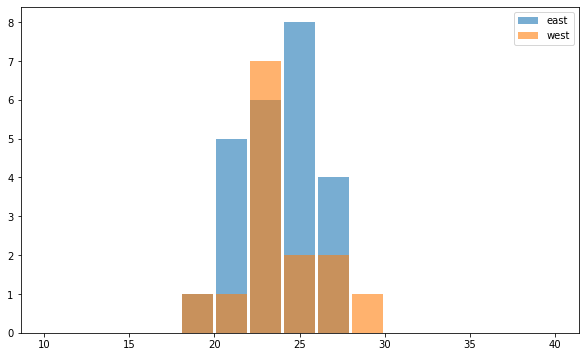

In [12]:
fig = plt.figure(figsize=(10,6))  # グラフをかく前のいつものおまじない
ax = fig.add_subplot(111)

# 10度-40度を15等分したヒストグラム
# np.histogramの返し値の1つ目は，頻度の数列，2つ目は ヒストグラムbinの両端のxの値
# 頻度数列よりも, binsの方が１つ多い
hist_temp_east, bins = np.histogram(temp_east, bins=15,range=(10.0,40.0))
hist_temp_west, bins = np.histogram(temp_west, bins=15,range=(10.0,40.0))

# これがpythonの秀逸なところ. for loopを回さないでも1行でやりたいことが書ける
# この一行で何をやっているのかは次のセルで説明する。
hist_x = (bins[1:]+bins[:-1])/2

print(bins)
print(hist_x)

# 棒グラフで表示する。alphaはグラフの透明度, 半透明にすると重なった部分が透けて見える。
plt.bar(hist_x, hist_temp_east, width=1.8, alpha=0.6, label='east')
plt.bar(hist_x, hist_temp_west, width=1.8, alpha=0.6, label='west')

# 凡例を表示
plt.legend()

[b-14] 分布はどうでしたでしょうか。

【余談】上記のプログラム中1行でコードが書けた話の解説をします。

In [13]:
my_test_list =np.array([0,1,2,3,4,5])
print("[1:]は %s " % my_test_list[1:])
print("[:-1]は %s " % my_test_list[:-1])
print("なので平均は %s " % ((my_test_list[1:]+my_test_list[:-1])/2) )

[1:]は [1 2 3 4 5] 
[:-1]は [0 1 2 3 4] 
なので平均は [0.5 1.5 2.5 3.5 4.5] 


## 湿度のグラフも作ってみましょう

[b-15] やり方は全く一緒です。temp(温度)->humid(湿度)に書き換えます。また，表示する範囲ですが，0%から100%までめいいっぱい広げてみましょう。

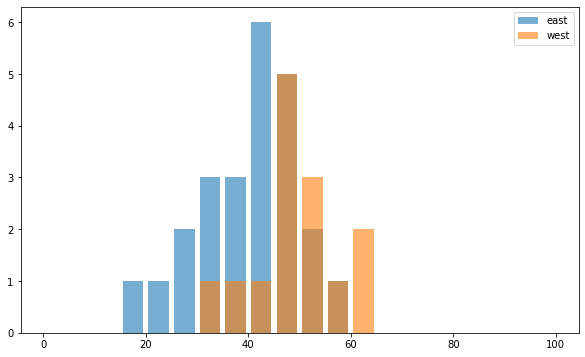

In [14]:
fig = plt.figure(figsize=(10,6)) # グラフをかく前のいつものおまじない
ax = fig.add_subplot(111)

# 温度のセルを参照。ほとんど同じ。
hist_humid_east, bins = np.histogram(humid_east, bins=20,range=(0.0,100.0))
hist_humid_west, bins = np.histogram(humid_west, bins=20,range=(0.0,100.0))
hist_x = (bins[1:]+bins[:-1])/2

# 温度のセルを参照。ほとんど同じ。
plt.bar(hist_x, hist_humid_east, width=4.0, alpha=0.6, label='east')
plt.bar(hist_x, hist_humid_west, width=4.0, alpha=0.6, label='west')

# 温度のセルを参照。同じ。
plt.legend()

## 実習１

1. 温度のグラフ同様に，湿度のグラフについても考察してみよう。
2. 温度，湿度のグラフと先程出した平均値，標準偏差の値を見比べてみる。グラフで読み取れる直観と先程得られた数字が符合しているかを確認しよう。 

# 仮説検定

[b-16] それでは検定作業に入って行きましょう。検定を始める上で最初に最も大事なのは，「帰無仮説」を正確に立てることです。どういう分布を仮定して（どういう状況を仮定して），何に対して検定を行うのかという点が大事です。


## １つ目の検定：東と西のデータの平均値は同じか否か

[b-17] 先程グラフで見ていたものを定量的に扱いましょう。平均値が一致するかどうかということで，比較するべきは分布そのものではなく，平均値とその広がり（=標準誤差）が重なっているかどうかです。標準誤差は$\sigma/\sqrt{n}$のように，標準偏差($\sigma$)をそのデータの個数$n$の平方根$\sqrt{n}$で割ったものになります。N(平均，標準誤差)となる，正規分布を作ってみましょう。

まずは先程得られた（代入する前にもう一度計算するが），東・西の，温度・湿度の平均・標準偏差をもとに
正規分布による確率分布を求めます。 rv_XXX は確率密度関数を表します。rv_temp_eastは東データの温度の確率密度分布を表します。

In [15]:
rv_temp_east = stats.norm(temp_east.mean(),temp_east.std()/np.sqrt(temp_east.size))
print("[東の結果]")
print("東の温度の平均値は: %5.2F 度" % rv_temp_east.mean())
print("東の温度の標準誤差は: %5.2F 度" % rv_temp_east.std())

rv_humid_east = stats.norm(humid_east.mean(),humid_east.std()/np.sqrt(humid_east.size))
print("東の湿度の平均値は: %5.2F パーセント" % rv_humid_east.mean())
print("東の湿度の標準誤差は: %5.2F パーセント" % rv_humid_east.std())

print("[西の結果]")
rv_temp_west = stats.norm(temp_west.mean(),temp_west.std()/np.sqrt(temp_west.size))
print("西の温度の平均値は: %5.2F 度" % rv_temp_west.mean())
print("西の温度の標準誤差は: %5.2F 度" % rv_temp_west.std())

rv_humid_west = stats.norm(humid_west.mean(),humid_west.std()/np.sqrt(humid_west.size))
print("西の湿度の平均値は: %5.2F パーセント" % rv_humid_west.mean())
print("西の湿度の標準誤差は: %5.2F パーセント" % rv_humid_west.std())

[東の結果]
東の温度の平均値は: 23.88 度
東の温度の標準誤差は:  0.41 度
東の湿度の平均値は: 39.80 パーセント
東の湿度の標準誤差は:  1.96 パーセント
[西の結果]
西の温度の平均値は: 23.51 度
西の温度の標準誤差は:  0.57 度
西の湿度の平均値は: 48.30 パーセント
西の湿度の標準誤差は:  2.33 パーセント


平均値は先程と変わっていないのですが，幅はかなり狭くなっています。数字だけみても分からないので
分布を早速見てみましょう。

## 温度の平均の分布

[b-18] 温度の平均分布を見てみましょう

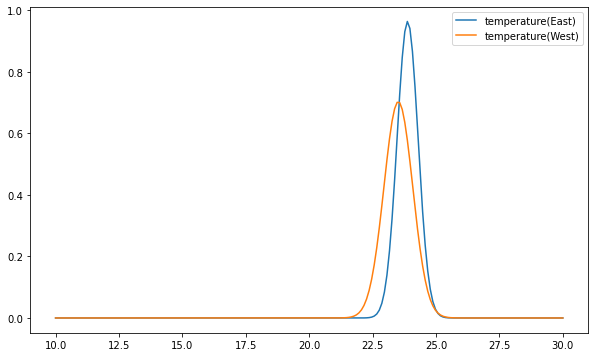

In [16]:
fig = plt.figure(figsize=(10,6)) # グラフを書く時のいつものおまじない
ax = fig.add_subplot(111)

xs = np.linspace(10,30,200)   # 10-30の間を200等分 (温度分布に合わせてここは書き換える必要があるかも知れない)
ax.plot(xs, rv_temp_east.pdf(xs), label="temperature(East)")
ax.plot(xs, rv_temp_west.pdf(xs), label="temperature(West)")

ax.legend()



## 湿度の平均の分布
[b-19] 次は湿度です。

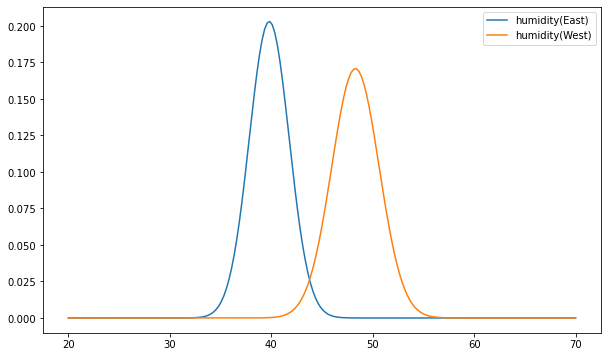

In [17]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(20,70,200) # 20-70の間を200等分 (湿度分布に合わせてここは書き換える必要があるかも知れない)
ax.plot(xs, rv_humid_east.pdf(xs), label="humidity(East)")
ax.plot(xs, rv_humid_west.pdf(xs), label="humidity(West)")

ax.legend()

分布を比較してどうでしたでしょうか。

## さていよいよ t検定です。
[b-20] ここでは２つの，独立な分布の間のt値，そしてそのt値に対応するp値を求めます。２つの値が一致するという帰無仮説に対して95%の信頼度(5%の有意水準)で検定を行います。つまりp値が5%よりも小さければ，帰無仮説は棄却されます，逆に5%よりも大きければ，帰無仮説は採択されます。

pythonのscipy.statsモジュールには ttest_ind(array1, array2, evaal_var)というメソッドが予め用意されています。array1, array2には２つの配列を指定します。ここではもともとの温度・湿度値の配列を与えます。ここでarray1には東のデータを，array2には西のデータを与えます。同じ温度データでも，東と西の測定は違う人が行っているので，独立な対応のないデータセットであります。この場合ttest_ind()を使います。("ind"はindependence(独立)の意味)。最後の引数，**equal_var は比較する２つの分布の分散が同じ場合はequal_var = True, 異なる場合は Falseとなります**。今回の例では異なることを仮定してFalseという値を入れてあります。

【余談】ここでは用いませんが，１つのサンプルを使ってttest_1samp(array, 0)という検定を行うこともできます。例えば，今回の例で言えば，複数の人々がある環境で測定１を行い，環境を少し変えて測定２を行ったとして，その差(array=測定1−測定2)が0と無矛盾かどうかということを検定する際には，ttest_1samp()を使えます。

### 東 vs. 西，温度に関して
[b-21] 温度に関して検定結果を見てみます。

In [18]:
# 分散が異なる２つのサンプルの対応のないt検定を定義します。
t_temp, p_temp = stats.ttest_ind(temp_east, temp_west, equal_var=False)
print("温度の分布に関して")
print("tの値は %5.3f" % t_temp)
print("pの値は %5.3f" % p_temp)

温度の分布に関して
tの値は 0.503
pの値は 0.619


２つのデータ（東の温度，西の温度）の平均値が一致するという「帰無仮説」は 5%の有意水準で採択されたでしょうか？

### 東 vs. 西，湿度に関して
[b-22] 湿度に関して検定結果を見てみます。

In [19]:
t_humid, p_humid = stats.ttest_ind(humid_east, humid_west, equal_var=False)
print("湿度の分布に関して")
print("tの値は %5.3f" % t_humid)
print("pの値は %5.3f" % p_humid)

湿度の分布に関して
tの値は -2.701
pの値は 0.011


２つのデータ（東の湿度，西の湿度）の平均値が一致するという「帰無仮説」は 5%の有意水準で採択されたでしょうか？

## 各自の測定 vs. 地域別分布

[b-23] さていよいよ各自のデータと，地域別の分布との比較になります。

今回は**湿度だけ確認してみましょう**。

今回，各自のデータは温度，湿度それぞれ１つづつ書いてもらいましたので，サンプル数は１です。
しかし実際には測定で25回の連続測定を行いその平均値を求めたのでした。ここでは簡単のため，３回の測定をしたことにして，平均値，平均値+1, 平均値-1の３測定であったということにしましょう。３つの平均を計算すればもちろん，もとの平均値になります。湿度の測定は最小単位が1％でしたので，平均値付近の幅としては+1/-1で申し分ありません。

In [20]:
my_humidity = 23.0    # 自分の湿度の値に置き換えてみましょう。
my_humid_array = [my_humidity, my_humidity+1, my_humidity-1]
my_humid_array

[23.0, 24.0, 22.0]

### 東グループデータとの比較
[b-24] 自分のデータと東のデータを比較してみましょう

In [21]:
t_myhumid_e, p_myhumid_e = stats.ttest_ind(my_humid_array, humid_east, equal_var=False)
print("自分の湿度測定は東の都道府県に対して")
print("tの値は %5.3f" % t_myhumid_e)
print("pの値は %5.3f" % p_myhumid_e)

自分の湿度測定は東の都道府県に対して
tの値は -8.050
pの値は 0.000


### 西グループデータとの比較
[b-25] 自分のデータと西のデータを比較してみましょう

In [22]:
t_myhumid_w, p_myhumid_w = stats.ttest_ind(my_humid_array, humid_west, equal_var=False)
print("自分の湿度測定は西の都道府県に対して")
print("tの値は %5.3f" % t_myhumid_w)
print("pの値は %5.3f" % p_myhumid_w)

自分の湿度測定は西の都道府県に対して
tの値は -10.158
pの値は 0.000


## 実習2

自分の測定値(平均値)と，各地域の平均値との間のt値，p値が求まっています。帰無仮説が採択されたのか，棄却されたのかそれぞれ考察してみましょう。

# $\chi^2$検定

[b-26] 「カイにじょう」検定と読みます。正式にはギリシャ文字で$\chi^2$検定と書きます。以下，面倒なのでchi2検定と書きます。
chi2検定には2種類あります。
1. 適合度のchi2検定 (chi2-test of goodness of fit)
2. 独立性のchi2検定（chi2-test for indenependence）
ここでは，1の適合度のchi2検定を扱います。

今回得られた全国の温度データは正規分布の形をしているでしょうか？ それを
確かめたいと思います。まずは東西で区別せずに，温度，湿度のリストを作ります。

In [23]:
temp_all  = my_array_ew[:,3]
humid_all = my_array_ew[:,4]
print("all temperature: ", temp_all) #  温度のリストをプリントしてみます
print("all humidity: ", humid_all)   #　同様に湿度のリストもプリントします

all temperature:  [21.5 22.1 24.8 21.8 21.2 24.3 21.9 24.2 25.8 22.9 26.6 25.2 25.7 26.9
 23.6 19.4 24.4 26.5 21.8 23.1 26.1 23.1 22.0 19.8 26.2 23.5 28.1 21.6
 22.4 22.4 22.3 24.7 22.3 24.7 23.7 27.5 23.2 25.0]
all humidity:  [18.8 36.6 31.5 41.2 51.8 48.0 38.9 43.9 26.0 46.1 42.0 43.1 59.8 46.6
 45.2 52.9 41.1 36.2 47.0 45.8 50.3 41.0 45.0 53.8 32.0 56.1 41.0 45.0
 37.3 45.0 46.8 50.3 63.1 64.7 32.0 28.0 34.6 23.0]


[b-27] では，温度のデータに集中します。温度のデータからヒストグラムを作ります。あるビンにあるエントリーの
高さが$n$のときには，ポワソン分布の性質から，そのエラーは$\sqrt{n}$となります。

hist_x:  [18.714285714285715 20.142857142857142 21.57142857142857 23.0
 24.42857142857143 25.857142857142854 27.285714285714285]
hist_y:  [ 1  1  8 11  7  6  3]
hist_yerr:  [1.         1.         2.82842712 3.31662479 2.64575131 2.44948974
 1.73205081]
hist_y sum: 37
fitting_calc sum: 36.89765861464475


0.002773655272387206

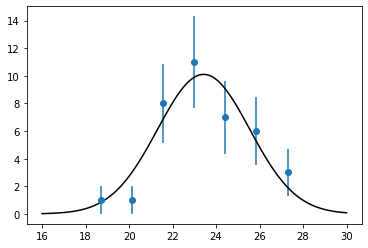

In [24]:
from scipy.optimize import curve_fit

# ＜＝ の印があるところは受講者が必要に応じて書き換える

# 全温度情報を用いて，ヒストグラムを作る
# [b-13]のグラフを参考にするとよい ここでは18-28度を 7分割する　
hist_y,bins = np.histogram(temp_all,bins=7,range=(18.0,28.0)) # ＜＝
hist_x = (bins[1:]+bins[:-1])/2
hist_yerr = np.sqrt(hist_y)

# ここで新たに作った配列の中身を確認しましょう。
print("hist_x: ", hist_x)
print("hist_y: ", hist_y)
print("hist_yerr: ", hist_yerr)

# エラー棒がついたヒストグラムの表示をします。
# fmt = マーカーの表示("o"=丸，"."=点，"s"=四角)
plt.errorbar(hist_x, hist_y, yerr=hist_yerr, fmt='o')
           
# -- 関数式の定義 -----------------------------------------------   
# 正規分布の定義式です。
def func(x, a, mu, sigma):
    return a*np.exp(-(x.astype(np.float64)-mu)**2/(2*sigma**2))
# --------------------------------------------------------------

# 以下で関数によるfitを行います。fitというのは，関数のパラメータを変化させて，その関数が一番よく
# 頻度分布と一致するパラメータを探す作業です。curve_fitというメソッドを使うと，poptとpcovという
# ２つの結果を返します。ここで使うのはpopt(最適パラメータ)の方です。

param_ini = [10,20,10]  # パラメータへ初期値を入力 (高さ，中心値，幅の順番)　＜＝　　
popt, pcov = curve_fit(func, hist_x, hist_y, p0=param_ini) # 頻度分布に関数fitをかけます。


fit_x = np.linspace(16.0,30.0,100) # fitに用いる関数の範囲（x1,x2）と分割数（細かさ） ＜＝　
fitting_draw = func(fit_x, popt[0],popt[1],popt[2])   # なめらかな関数を描くための関数を用意(100個の数字列)
fitting_calc = func(hist_x, popt[0],popt[1],popt[2])  # 計算用にデータ点と同じx値のリストhist_x()を用意

# print('fitting_calc:',fitting_calc)

plt.plot(fit_x,fitting_draw,'k') # なめらかな曲線を描画

print('hist_y sum:', hist_y.sum())
print('fitting_calc sum:', fitting_calc.sum())
(hist_y.sum()-fitting_calc.sum())/fitting_calc.sum()

### $\chi^2$の計算

[b-28] 図を見てうまくfitができているか確認しましょう。Fitの曲線とデータ点との間の
chi2を計算してみましょう。データ点のxの値に沿って，データ点のyの値(hist_y), 曲線の方のyの値（fitting_calc）
があるので，それをstats.chisquareに渡してあげると，chi2の値と，p値を計算してくれます。

In [25]:
sum_fit=fitting_calc.sum()
sum_hist=hist_y.sum()
hist_yy = sum_fit/sum_hist * hist_y
# print("fit: %5.2f, hist: %5.2f" % sum_fit, sum_hist)
print("fit: %5.2f, hist: %5.2f " % (sum_fit,sum_hist))

chisq, pvalue=stats.chisquare(fitting_calc, hist_yy, ddof=3)
print("chisq: %5.2f " % chisq)

fit: 36.90, hist: 37.00 
chisq:  5.53 


[b-29] これは大きいのでしょうか，小さいのでしょうか。適合度の検定はどういう結果になるのでしょうか。

そこで優位度5%（両側検定を考えてそれぞれの端に2.5%）の検定をしましょう。データ数＝自由度
なのですが，ここでは一つだけ注意が必要です。fitした際に，3パラメータの関数でfitしているので，
自由度が３つ失われています。なので自由度=(データ数-3)のchi2分布の両端2.5%となる場合の
xの範囲（信頼区間）を求めたいと思います。stats.chi2.intervalで信頼度(=1-有意度)を与えると，両端の
xの値を返してくれます。

In [26]:
# 2.5% と 97.5%
df = len(hist_x)
chi2_025, chi2_975 = stats.chi2.interval(alpha=0.95, df=df-3)
print("自由度 %d の chi2分布の p=0.025 に対応する値は %5.2F " % (df-3, chi2_025))
print("　　　　　　　　　　　　  p=0.975 に対応する値は %5.2F " % (chi2_975))



自由度 4 の chi2分布の p=0.025 に対応する値は  0.48 
　　　　　　　　　　　　  p=0.975 に対応する値は 11.14 


## 実習３

1. こちらのデータと正規分布が適合しているという帰無仮説は有意度5%の両側chi2検定で棄却されたのでしょうか，採択されたのでしょうか
2. 片側5%検定にするにはどうすればよいでしょうか？適合度の検定の結果はどうなりますか？